In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("./cropRecData.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,77,49,42,20.879744,82.002744,6.502985,202.935536,rice
1,89,55,41,21.770462,80.319644,7.038096,226.655537,rice
2,98,56,37,23.004459,82.320763,7.840207,263.964248,rice
3,78,41,42,26.491096,80.158363,6.980401,242.864034,rice
4,81,42,37,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,106,19,35,26.774637,66.413269,6.780064,177.774507,coffee
2196,88,35,32,27.417112,56.636362,6.086922,127.924610,coffee
2197,85,16,34,24.131797,67.225123,6.362608,173.322839,coffee
2198,100,37,30,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
crops_list = ['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange', 'apple', 'muskmelon',
              'watermelon', 'grapes', 'mango', 'banana', 'pomegranate', 'lentil', 'blackgram',
              'mungbean', 'mothbeans', 'pigeonpeas', 'kidneybeans', 'chickpea', 'coffee']

In [5]:
X = df.drop(columns = ['label'])
y_labels = df['label']

encoder = OneHotEncoder(sparse_output = False)
y_labels = np.array(y_labels).reshape(-1,1)
y = encoder.fit_transform(y_labels)


In [6]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,77,49,42,20.879744,82.002744,6.502985,202.935536
1,89,55,41,21.770462,80.319644,7.038096,226.655537
2,98,56,37,23.004459,82.320763,7.840207,263.964248
3,78,41,42,26.491096,80.158363,6.980401,242.864034
4,81,42,37,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,106,19,35,26.774637,66.413269,6.780064,177.774507
2196,88,35,32,27.417112,56.636362,6.086922,127.924610
2197,85,16,34,24.131797,67.225123,6.362608,173.322839
2198,100,37,30,26.272418,52.127394,6.758793,127.175293


In [7]:
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
scaler1 = StandardScaler()
xcols = X.columns
X = scaler1.fit_transform(X)
X = pd.DataFrame(X, columns = xcols)

In [9]:
x_train, xset, y_train, yset = train_test_split(X, y, test_size = 0.4)
x_test, x_val, y_test, y_val = train_test_split(xset, yset, test_size = 0.5)

In [10]:
def gen_model():
  model = tf.keras.models.Sequential([
      Dense(35, activation = 'relu', input_shape = x_train.shape[1:]),
      Dense(49, activation = 'relu'),
      Dense(35, activation = 'relu'),
      Dense(22, activation = 'softmax')
  ])
  model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model

In [11]:
model = gen_model()

In [12]:
history = model.fit(x_train,y_train,
                    epochs=29,
                    validation_data=(x_val,y_val),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/29
42/42 [==============================] - 1s 10ms/step - loss: 2.9350 - accuracy: 0.1697 - val_loss: 2.6872 - val_accuracy: 0.3500
Epoch 2/29
42/42 [==============================] - 0s 3ms/step - loss: 2.3581 - accuracy: 0.4386 - val_loss: 1.9280 - val_accuracy: 0.5818
Epoch 3/29
42/42 [==============================] - 0s 3ms/step - loss: 1.5321 - accuracy: 0.6174 - val_loss: 1.1553 - val_accuracy: 0.7136
Epoch 4/29
42/42 [==============================] - 0s 3ms/step - loss: 0.9069 - accuracy: 0.7765 - val_loss: 0.7040 - val_accuracy: 0.8568
Epoch 5/29
42/42 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.8636 - val_loss: 0.4693 - val_accuracy: 0.9091
Epoch 6/29
42/42 [==============================] - 0s 4ms/step - loss: 0.4256 - accuracy: 0.8985 - val_loss: 0.3477 - val_accuracy: 0.9341
Epoch 7/29
42/42 [==============================] - 0s 3ms/step - loss: 0.3291 - accuracy: 0.9227 - val_loss: 0.2746 - val_accuracy: 0.9432
Epoch 8/29
42/42 [=

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

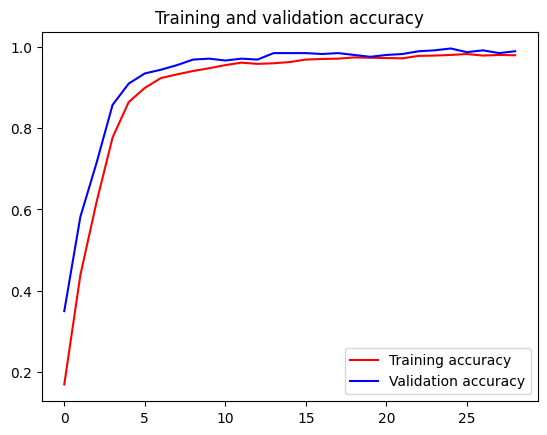

<Figure size 640x480 with 0 Axes>

In [14]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

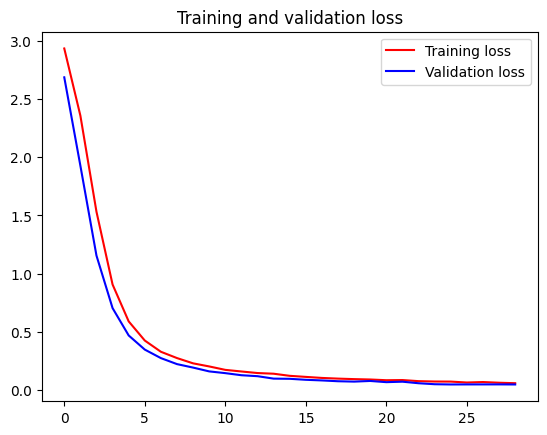

<Figure size 640x480 with 0 Axes>

In [15]:
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [16]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

14/14 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9818
Test Accuracy: 98.18181991577148


In [ ]:
# model.save_weights("Crop_Recommender_weights.h5")

In [17]:
# model.load_weights("Crop_Recommender_weights.h5")

In [18]:
y_pred = model.predict(x_test)

14/14 [==============================] - 0s 2ms/step


In [19]:
y_pred.shape

(440, 22)

In [20]:
y_test.shape

(440, 22)

In [21]:

# Convert y_pred to predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming you want the class with highest probability

# If y_test is one-hot encoded, convert it to class labels
if y_test.ndim == 2:  # Check if y_test is a 2D array (likely one-hot encoded)
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test  # If y_test is already in class label format, no conversion needed

# Now generate the classification report
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        24
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24
           8       0.82      1.00      0.90        14
           9       1.00      0.95      0.97        19
          10       0.96      0.96      0.96        26
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        14
          13       0.96      1.00      0.98        22
          14       1.00      1.00      1.00        21
          15       1.00      0.94      0.97        16
          16       1.00      1.00      1.00        17
          17       1.00    

In [22]:
# for i in range(len(y_pred)):
#   print(crops_list[np.argmax(y_test[i])], "-", crops_list[np.argmax(y_pred[i])])

In [23]:
X.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [24]:
custom_data = pd.DataFrame({
    'N': [20],
    'P': [20],
    'K': [20],
    'temperature': [25],
    'humidity': [20],
    'ph': [5.5],
    'rainfall': [50],
})

custom_data = scaler1.transform(custom_data)
custom_data = pd.DataFrame(custom_data, columns = xcols)

In [25]:
custom_prediction = model.predict(custom_data)

1/1 [==============================] - 0s 22ms/step


In [26]:
print(crops_list[np.argmax(custom_prediction)])

pomegranate
